<a href="https://colab.research.google.com/github/oopp456789/oopp/blob/master/20201223NP-complete%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**哈密頓路徑問題**

---



哈密​​頓圖（英語：Hamiltonian graph，或Traceable graph）是一個無向圖，由天文學家哈密頓提出，由指定的起點前往指定的終點，途中經過所有其他節點且只經過一次。在圖論中是指含有哈密頓迴路的圖，閉合的哈密頓路徑稱作哈密頓迴路（Hamiltonian cycle），含有圖中所有頂點的路徑稱作哈密頓路徑（Hamiltonian path）。


---



哈密​​頓路徑問題在上世紀七十年代初，終於被證明是“NP完全”的。據說具有這樣性質的問題，難於找到一個有效的算法。實際上對於某些頂點數不到100的網絡，利用現有最好的算法和計算機也需要比較荒唐的時間（比如幾百年）才能確定其是否存在一條這樣的路徑。
從圖中的任意一點出發，路途中經過圖中每一個結點當且僅當一次，則成為哈密頓迴路。
要滿足兩個條件：

⒈封閉的環

⒉是一個連通圖，且圖中任意兩點可達
經過圖（有向圖或無向圖）中所有頂點一次且僅一次的通路稱為哈密頓通路。
經過圖中所有頂點一次且僅一次的迴路稱為哈密頓迴路。
具有哈密頓迴路的圖稱為哈密頓圖，具有哈密頓通路但不具有哈密頓迴路的圖稱為半哈密頓圖。




對於無向圖來說，哈密頓路徑對於圖每個頂點只訪問一次。哈密頓回路（或哈密頓迴圈）是一個哈密頓路徑，並且從哈密頓路徑的最後一個頂點到第一個頂點存在邊緣（也就是可以回到初始位置）。確定給定圖是否包含哈密頓回路。如果包含，則列印路徑。以下是所需功能的輸入和輸出。



輸入：2D陣列graph[V][V]（其中V是圖中的頂點數，通過鄰接矩陣表示）。如果從i到j存在一條邊，則graph[i][j]為1，否則graph[i][j]為0。



輸出：包含哈密頓回路的path[V]。path[i]應該表示哈密頓回路中的第i個頂點。如果圖中沒有哈密頓回路，程式碼也應該返回false。



---




例如，下圖中的哈密頓迴路是{0,1,2,4,3,0}。

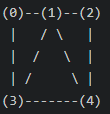

並且下圖不包含任何哈密爾頓迴路。

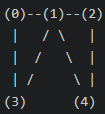

解題思路

最簡單的思路就是，生成頂點的全排列，然後循環遍歷每個排列是不是滿足條件。偽代碼

當存在未遍歷到的組合時
{
    if（兩個連續頂點之間有邊
       並且最後一個頂點和初始點是相連通的）。
   {
       打印這種排列方式。
       break;
   }
}

這種算法的時間複雜度是O（n！）級別的，顯然如果n較大的話，那麼這種做法是不合理的。我們可以使用回溯法解决這個問題。



我們首先創建一個空的path，並且將0這個點加入其中。然後我們從1開始添加後續頂點。在添加後續頂點之前，我們首先要檢查這些頂點是不是與之前添加的頂點相鄰並且我們沒有添加過。如果找到了這樣的點的話，我們就將它添加到path中去，接著我們就要判斷下一個位置的點，在此之前我們先要判斷我們現在path中點的數量是不是已經是全部點的個數了，如果是的話我們要判斷頭結點和尾節點是不是存在邊，如果存在的話，我們就輸出path，如果不存在，我們就要將剛才加入的點給彈出，繼續加入下一個有效點測試。



---



下面是回溯法解決問題的代碼：

In [ ]:
class Graph: 
    def __init__(self, vertices): 
        self.graph = [[0 for column in range(vertices)]\
                            for row in range(vertices)] 
        self.V = vertices 
  
    '''
    Check if this vertex is an adjacent vertex  
    of the previously added vertex and is not  
    included in the path earlier 
    '''
    def isSafe(self, v, pos, path): 
        # Check if current vertex and last vertex  
        # in path are adjacent 
        if self.graph[ path[pos-1] ][v] == 0: 
            return False
  
        # Check if current vertex not already in path 
        for vertex in path: 
            if vertex == v: 
                return False
  
        return True
  
    # A recursive utility function to solve  
    # hamiltonian cycle problem 
    def hamCycleUtil(self, path, pos): 
        # base case: if all vertices are  
        # included in the path 
        if pos == self.V: 
            # Last vertex must be adjacent to the  
            # first vertex in path to make a cyle 
            if self.graph[ path[pos-1] ][ path[0] ] == 1: 
                return True
            else: 
                return False
  
        # Try different vertices as a next candidate  
        # in Hamiltonian Cycle. We don't try for 0 as  
        # we included 0 as starting point in in hamCycle() 
        for v in range(1,self.V): 
            if self.isSafe(v, pos, path) == True: 
                path[pos] = v 
                if self.hamCycleUtil(path, pos+1) == True: 
                    return True
                # Remove current vertex if it doesn't  
                # lead to a solution 
                path[pos] = -1
  
        return False
  
    def hamCycle(self): 
        path = [-1] * self.V 
        ''' 
        Let us put vertex 0 as the first vertex  
        in the path. If there is a Hamiltonian Cycle,  
        then the path can be started from any point 
        of the cycle as the graph is undirected 
        '''
        path[0] = 0
        if self.hamCycleUtil(path,1) == False: 
            print("Solution does not exist")
            return False
  
        self.printSolution(path) 
        return True
  
    def printSolution(self, path): 
        print("Solution Exists: Following is one Hamiltonian Cycle")
        for vertex in path: 
            print(vertex, end=' ') 
        print(path[0])
  
# Driver Code 
  
'''
 Let us create the following graph 
      (0)-------(1)-----(2) 
       |   / \   | 
       |  /   \  | 
       | /     \ | 
      (3)---------------(4)    
'''
g1 = Graph(5) 
g1.graph = [ [0, 1, 0, 1, 0], [1, 0, 1, 1, 1],  
             [0, 1, 0, 0, 1,],[1, 1, 0, 0, 1],  
             [0, 1, 1, 1, 0], ] 
  
# Print the solution 
g1.hamCycle()
  
'''
Let us create the following graph 
       (0)------(1)----(2) 
       |   / \   | 
       |  /   \  | 
       | /     \ | 
       (3)      (4)
'''
g2 = Graph(5) 
g2.graph = [ [0, 1, 0, 1, 0], [1, 0, 1, 1, 1],  
           [0, 1, 0, 0, 1,], [1, 1, 0, 0, 0],  
           [0, 1, 1, 0, 0], ] 
  
# Print the solution 
g2.hamCycle()
  
# This code is contributed by Divyanshu Mehta 